Importing The Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

Importing The Dataset

In [3]:
dataset = pd.read_csv("data/Position_Salaries.csv")

In [4]:
# Printing the first 5 columns
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


Pre Processing

In [7]:
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1:].values

In [8]:
print("X shape",X.shape)
print("Y shape",Y.shape)

X shape (10, 1)
Y shape (10, 1)


Splitting The Data into Training And Testing Data

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

Training Model

In [10]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [17]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,Y)

LinearRegression()

In [18]:
print(X_poly)

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


Visualising The linear Regression Results

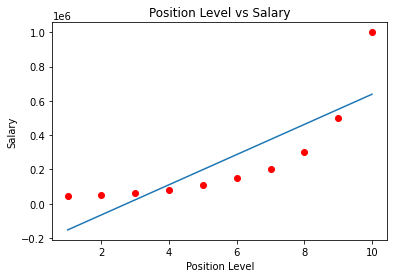

In [19]:
plt.scatter(X,Y,color="red")
plt.plot(X,model.predict(X))
plt.title('Position Level vs Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualising The Polynomial Regression

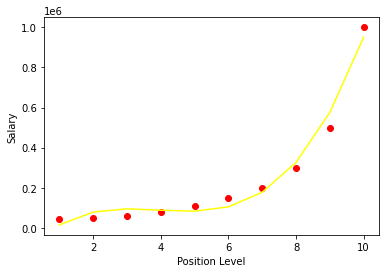

In [20]:
plt.scatter(X,Y,color="red")
plt.plot(X,lin_reg.predict(X_poly) , color="yellow")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Predicting a new Result with Linear Regression

In [21]:
model.predict([[6.5]])

array([[331012.93103448]])

Predicting a new Result With Polynomial Regression

In [23]:
lin_reg.predict(poly_reg.fit_transform([[6.5]]))

array([[133259.46969697]])